In [1]:
#imports
import pandas as pd 
import matplotlib as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import sklearn as skl 
import tensorflow as tf  

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1a4205be50&gt;

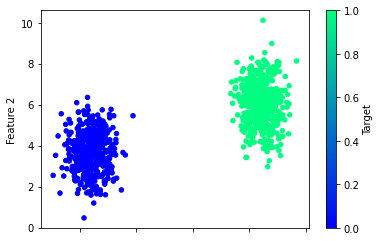

In [2]:
#generate dummy values
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#create a dataframe with dummy values
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

#plot dummy values
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
#use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
#normalize our dummy values

#create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

#fit the scaler with training data
X_scaler.fit(X_train)

#Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

In [5]:
#create keras sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# add first dense layer, including input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# add output layer that uses probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
#check structure of sequential model
nn_model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
#compile the sequential model and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
#fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 2s 3ms/sample - loss: 0.3918 - accuracy: 0.9720
Epoch 2/100
750/750 [==============================] - 0s 126us/sample - loss: 0.3822 - accuracy: 1.0000
Epoch 3/100
750/750 [==============================] - 0s 132us/sample - loss: 0.3731 - accuracy: 1.0000
Epoch 4/100
750/750 [==============================] - 0s 123us/sample - loss: 0.3643 - accuracy: 1.0000
Epoch 5/100
750/750 [==============================] - 0s 171us/sample - loss: 0.3559 - accuracy: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 219us/sample - loss: 0.3478 - accuracy: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 123us/sample - loss: 0.3400 - accuracy: 1.0000
Epoch 8/100
750/750 [==============================] - 0s 128us/sample - loss: 0.3325 - accuracy: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 116us/sample - loss: 0.3253 - accuracy: 1.0000
Epoch 10/100
750/750 [==============

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1a42b254d0&gt;

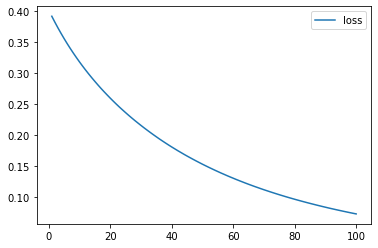

In [11]:
#visualize epochs 

history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

#plot loss
history_df.plot(y="loss")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1a42fa9dd0&gt;

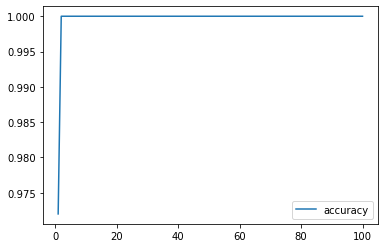

In [12]:
#plot accuracy
history_df.plot(y="accuracy")

In [13]:
#evaluate model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.0664 - accuracy: 1.0000
Loss: 0.07655072611570359, Accuracy: 1.0


In [14]:
#predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1a4331d350&gt;

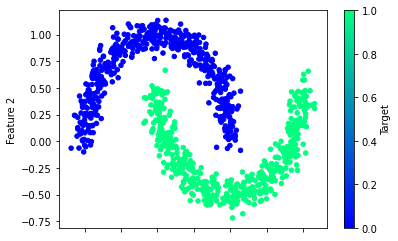

In [15]:
#create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)
#transform y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)
#create a dataframe to plot nonlinear data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
#plot dataframe
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [16]:
#split into training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)
#create scaler
X_moon_scaler = skl.preprocessing.StandardScaler()
#fit the scaler
X_moon_scaler.fit(X_moon_train)
#scale data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
#train model with nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 220us/sample - loss: 1.2316 - accuracy: 0.4960
Epoch 2/100
750/750 [==============================] - 0s 129us/sample - loss: 1.0752 - accuracy: 0.5133
Epoch 3/100
750/750 [==============================] - 0s 116us/sample - loss: 0.9754 - accuracy: 0.5240
Epoch 4/100
750/750 [==============================] - 0s 141us/sample - loss: 0.9086 - accuracy: 0.5360
Epoch 5/100
750/750 [==============================] - 0s 142us/sample - loss: 0.8611 - accuracy: 0.5440
Epoch 6/100
750/750 [==============================] - 0s 147us/sample - loss: 0.8229 - accuracy: 0.5600
Epoch 7/100
750/750 [==============================] - 0s 179us/sample - loss: 0.7933 - accuracy: 0.5720
Epoch 8/100
750/750 [==============================] - 0s 125us/sample - loss: 0.7681 - accuracy: 0.5800
Epoch 9/100
750/750 [==============================] - 0s 128us/sample - loss: 0.7465 - accuracy: 0.5907
Epoch 10/100
750/750 [============

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1a43545bd0&gt;

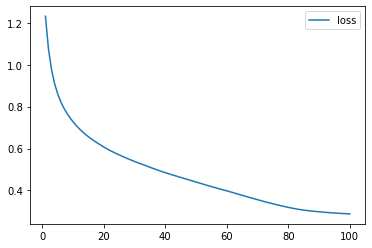

In [18]:
#create dataframe for training history
history_df = pd.DataFrame(model_moon.history, index=range(1, len(model_moon.history["loss"])+1))
history_df.plot(y="loss")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1a435d5f10&gt;

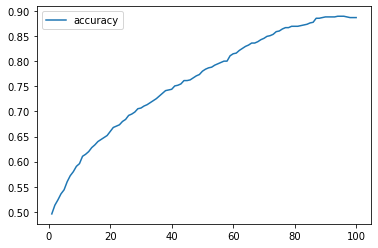

In [19]:
history_df.plot(y="accuracy")

In [22]:
#generate new sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
#compile model and customize metrics 
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#fit model to training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 2s 2ms/sample - loss: 0.6428 - accuracy: 0.5413
Epoch 2/100
750/750 [==============================] - 0s 137us/sample - loss: 0.6125 - accuracy: 0.5613
Epoch 3/100
750/750 [==============================] - 0s 128us/sample - loss: 0.5875 - accuracy: 0.5693
Epoch 4/100
750/750 [==============================] - 0s 225us/sample - loss: 0.5664 - accuracy: 0.5707
Epoch 5/100
750/750 [==============================] - 0s 236us/sample - loss: 0.5480 - accuracy: 0.5827
Epoch 6/100
750/750 [==============================] - 0s 141us/sample - loss: 0.5317 - accuracy: 0.5987
Epoch 7/100
750/750 [==============================] - 0s 127us/sample - loss: 0.5171 - accuracy: 0.6147
Epoch 8/100
750/750 [==============================] - 0s 144us/sample - loss: 0.5039 - accuracy: 0.6347
Epoch 9/100
750/750 [==============================] - 0s 146us/sample - loss: 0.4916 - accuracy: 0.6827
Epoch 10/100
750/750 [==============